The below code is very similar to Model 2. The main difference between the two is that here we perform data augmentation because of our small dataset. We again start by importing the required packages. For the below code we import an additional class from keras, namely ImageDataGenerator. This will help in augmenting the training data:

In [17]:
import tensorflow as tf
from tensorflow import keras
import sklearn
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from tqdm import tqdm
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
print(tf.__version__)


2.1.0


We then set our working directory, defining our training and test set:

In [18]:
DATADIR = r"C:\Users\theod\Desktop\2K19-20 Modules\Deep Learning\dl-medical-imaging\COVID19"
#setting directory
CATEGORIES_TRAINING = ["covid_train", "normal_train"]
CATEGORIES_TESTING = ["covid_test", "normal_test"]

Below we perform the augmentation. That is for each transformation on a training image, a new temporary image is produce in order to be fed to the model during the training phase:

In [19]:
IMG_SIZE =128 #define image size

generator = ImageDataGenerator(
    rotation_range=20, # rotate image
    width_shift_range=0.2, #change width
    height_shift_range=0.2, #change height
    horizontal_flip=True) # flip image


Now we create our training data, same as in Model 2:

In [20]:
#creating training data
training_data = []
def create_training_data():
    for category in CATEGORIES_TRAINING: 

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES_TRAINING.index(category) 
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])
            except Exception as e: 
                pass
          
create_training_data()
#randomly shuffling the training data     

100%|██████████| 20/20 [00:00<00:00, 88.15it/s]


We randomly shuffle the training data:

In [21]:
random.shuffle(training_data)
for sample in training_data[:20]:
    print(sample[1])
print(len(training_data))

x_train = []
y_train = []

for features,label in training_data:
    x_train.append(features)
    y_train.append(label)
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

1
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
1
0
0
0
40


We repeat exactly the same process for our test data:

In [22]:
test_data = []
def create_test_data():
    for category in CATEGORIES_TESTING:  # do infected & uninfected

        path = os.path.join(DATADIR,category)  # create path to infected & uninfected
        class_num = CATEGORIES_TESTING.index(category)  # get the classification  (0 or a 1). 0=Infected 1=Uninfected

        for img in tqdm(os.listdir(path)):  # iterate over each image per infected & uninfected
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))


In [23]:
create_test_data()
random.shuffle(test_data)

print(len(test_data))
x_test = []
y_test = []
for sample in test_data[:20]:
    print(sample[1])
for features,label in test_data:
    x_test.append(features)
    y_test.append(label)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)


100%|██████████| 5/5 [00:00<00:00, 27.92it/s]

10
1
0
0
1
1
1
1
0
0
0


Below we rescale the images, and define the hyperparameters of the model:

In [24]:
x_train = x_train/255
x_test = x_test/255

EPOCHS=20 # Number of iterations
INIT_LR=0.001 #Learning rate
BS=8 # Batch Size


Below we define our model (Model 2):

In [25]:
model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

opt = optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

We run the model using the augmented dataset using the following command. For each iteration 5 steps are performed (Length of training data / number of epochs = 40/8 = 5)

In [26]:
M = model.fit_generator(generator.flow(x_train, y_train, batch_size= BS ),
                    steps_per_epoch= len(x_train)//BS, epochs= EPOCHS)


  ...
    to  
  ['...']
Train for 5 steps
Epoch 1/20
5/5 [==============================] - 5s 996ms/step - loss: 1.3115 - accuracy: 0.6250
Epoch 2/20
5/5 [==============================] - 4s 780ms/step - loss: 0.6856 - accuracy: 0.5750
Epoch 3/20
5/5 [==============================] - 4s 780ms/step - loss: 0.6494 - accuracy: 0.6750
Epoch 4/20
5/5 [==============================] - 4s 789ms/step - loss: 0.5166 - accuracy: 0.9000
Epoch 5/20
5/5 [==============================] - 4s 834ms/step - loss: 0.3206 - accuracy: 0.9500
Epoch 6/20
5/5 [==============================] - 4s 787ms/step - loss: 0.3375 - accuracy: 0.8000
Epoch 7/20
5/5 [==============================] - 4s 805ms/step - loss: 0.3959 - accuracy: 0.8250
Epoch 8/20
5/5 [==============================] - 4s 779ms/step - loss: 0.2879 - accuracy: 0.8750
Epoch 9/20
5/5 [==============================] - 4s 817ms/step - loss: 0.3610 - accuracy: 0.8750
Epoch 10/20
5/5 [==============================] - 4s 777ms/step - loss: 0.

We want to summarise the above metrics in a graph. We will plot the training accuracy vs the loss:

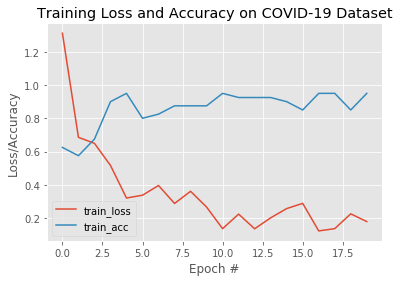

In [27]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), M.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), M.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")



The model generalises well. The training accuracy reaches a plateau while the learning rate keeps decreasing. Next, we return the test accuracy:

In [28]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc) #Comparing loss and accuracy

10/10 - 1s - loss: 0.1750 - accuracy: 0.9000

Test accuracy: 0.9


The model has a test accuracy of 90%. This is a relatively high accuracy, therefore we proceed by making predictions for our test data (Same as in the Malaria Dataset):

In [29]:
class_names = ['COVID-19 Pos','COVID-19 Neg']
probability_model = tf.keras.Sequential([model, 
                                        tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

print(predictions[1])#Shows array of probabilites 
print(np.argmax(predictions[1]))


[0.7290925 0.2709075]
0


We define the functions required to plot our test results:

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array), #100%
                                class_names[true_label]),
                                color=color)

In [31]:
x_test = x_test.reshape(10,IMG_SIZE,IMG_SIZE)    
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


We plot the results for the hole test set since we only have 10 images:

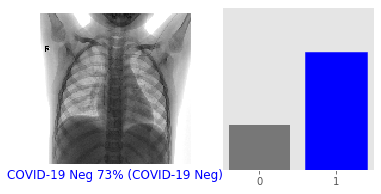

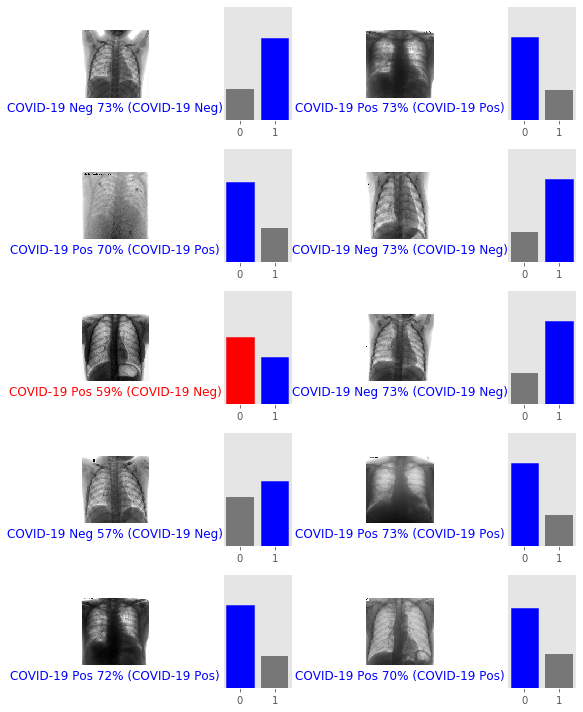

In [32]:
i = 0 #0th image, correect prediction is blue, incoreect is red
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


#Predictions for the first 15 images:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()